
## **Credit Card Fraud Detection**

### **Data Cleaning and Preprocessing**
The code starts by importing the necessary libraries, including pandas for data manipulation and sklearn for preprocessing and model training. It then loads the credit card transaction dataset from Kaggle using `pd.read_csv()`. The dataset is examined using `head()`, `tail()`, `shape`, `info()`, and `isnull().sum()` to understand its structure, check for missing values, and ensure data integrity. Duplicates are removed using `drop_duplicates()`.

The 'Amount' column is standardized using `StandardScaler()` from sklearn to bring all feature values to a similar scale. The 'Time' column, which is not required for analysis, is dropped using `drop()`.

### **Data Visualization for Balanced Dataset**
After preparing a balanced dataset by sampling regular transactions and combining them with fraudulent transactions, a bar chart is created using Matplotlib to visualize the distribution of classes ('Regular' and 'Fraudulent') in the balanced dataset. This visualization provides insights into the class distribution after balancing the dataset, which is crucial for model training and evaluation.

### **Data Preparation for Model Training**
The balanced dataset is split into features (X) and the target variable (y). The features are used to train three different models: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. The dataset is split into training and testing sets using `train_test_split()` from sklearn.

### **Model Training and Evaluation**
The three models are trained using their respective classes (`LogisticRegression()`, `DecisionTreeClassifier()`, `RandomForestClassifier()`), and predictions are made on the test set. Model performance metrics such as accuracy, recall, F1 score, and precision are calculated using functions from sklearn (`accuracy_score()`, `recall_score()`, `f1_score()`, `precision_score()`). These metrics evaluate the models' ability to detect fraudulent transactions accurately.

### **Model Comparison and Visualization**
The model performance metrics are organized into a DataFrame for easy comparison. A bar chart is created using Seaborn to visually compare the accuracy of the three models. This visualization helps in identifying the most effective model for credit card fraud detection based on accuracy.



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**LOAD THE DATASET**

In [4]:
dataset = pd.read_csv(r"creditcard.csv")

In [5]:
# Display the first few rows:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
# Display the last few rows:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
235715,148511.0,1.615429,-1.039467,-0.636240,0.232975,-0.662653,0.088561,-0.515181,0.111418,0.783888,...,0.341075,0.642586,0.065809,0.764829,-0.449210,0.582232,-0.075833,-0.020141,189.49,0.0
235716,148511.0,-0.104038,-0.457124,0.855257,-3.097072,-0.435057,-0.330294,-0.068401,-0.034265,-2.265087,...,-0.077021,0.164941,-0.148987,-0.517416,-0.317064,-0.333948,0.150006,0.147830,22.85,0.0
235717,148512.0,2.055778,0.101367,-1.900908,0.636800,0.426014,-0.711019,0.032779,-0.178211,0.830305,...,-0.051650,0.131994,0.047877,0.506089,0.135960,0.615253,-0.046082,-0.025144,4.99,0.0
235718,148512.0,1.589832,-0.727014,-0.684126,0.748099,-0.709069,-0.888547,0.095882,-0.217494,0.322617,...,0.174636,0.249431,0.107388,0.601874,-0.346055,0.149478,-0.071769,-0.023848,189.90,0.0
235719,148513.0,2.007468,0.246566,-1.662381,0.448064,0.261254,-1.252032,0.234749,-0.302207,0.197576,...,0.257160,0.922456,-0.032834,0.027182,0.238329,-0.129391,0.000506,-0.036000,NaN,NaN


In [7]:
# Check the shape of the dataset
dataset.shape

(235720, 31)

In [8]:
# Get information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235720 entries, 0 to 235719
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    235720 non-null  float64
 1   V1      235720 non-null  float64
 2   V2      235720 non-null  float64
 3   V3      235720 non-null  float64
 4   V4      235720 non-null  float64
 5   V5      235720 non-null  float64
 6   V6      235720 non-null  float64
 7   V7      235720 non-null  float64
 8   V8      235720 non-null  float64
 9   V9      235720 non-null  float64
 10  V10     235720 non-null  float64
 11  V11     235720 non-null  float64
 12  V12     235720 non-null  float64
 13  V13     235720 non-null  float64
 14  V14     235720 non-null  float64
 15  V15     235720 non-null  float64
 16  V16     235720 non-null  float64
 17  V17     235720 non-null  float64
 18  V18     235720 non-null  float64
 19  V19     235720 non-null  float64
 20  V20     235720 non-null  float64
 21  V21     23

In [9]:
# Check for missing values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

**EXPLORATORY DATA ANALYSIS**

<ipython-input-10-d22c41e9ab9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=dataset, palette='Set1')


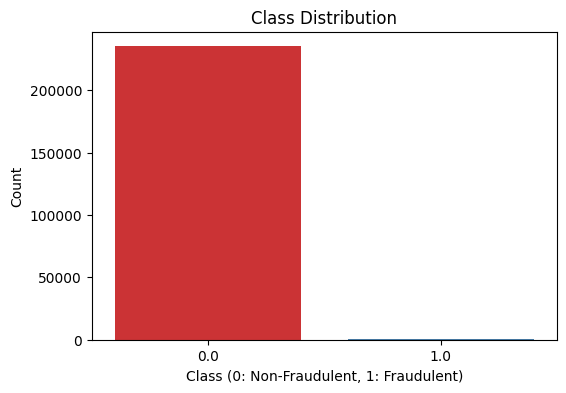

In [10]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=dataset, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

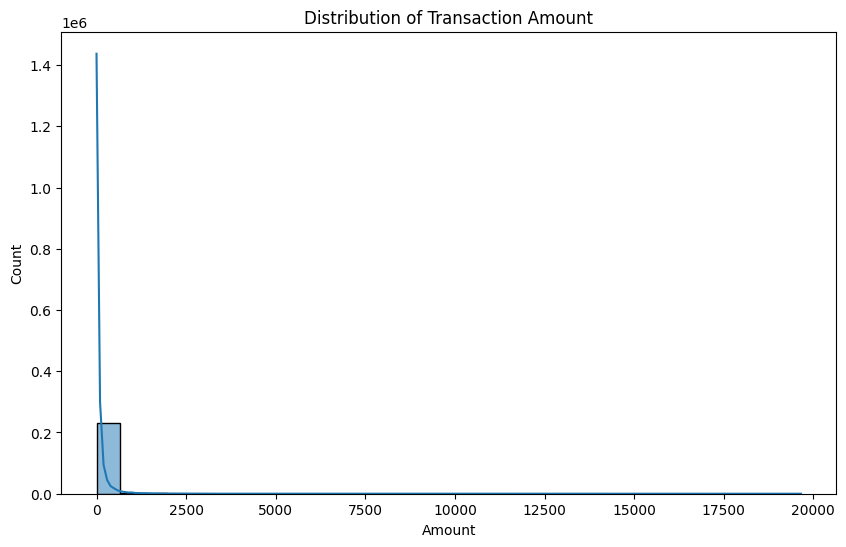

In [11]:
# Amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

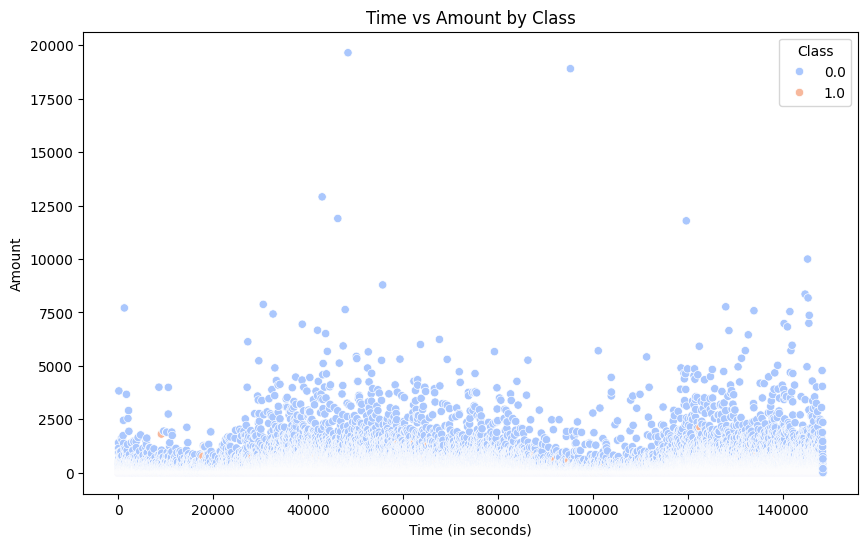

In [12]:
# Time vs Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=dataset, hue='Class', palette='coolwarm')
plt.title('Time vs Amount by Class')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

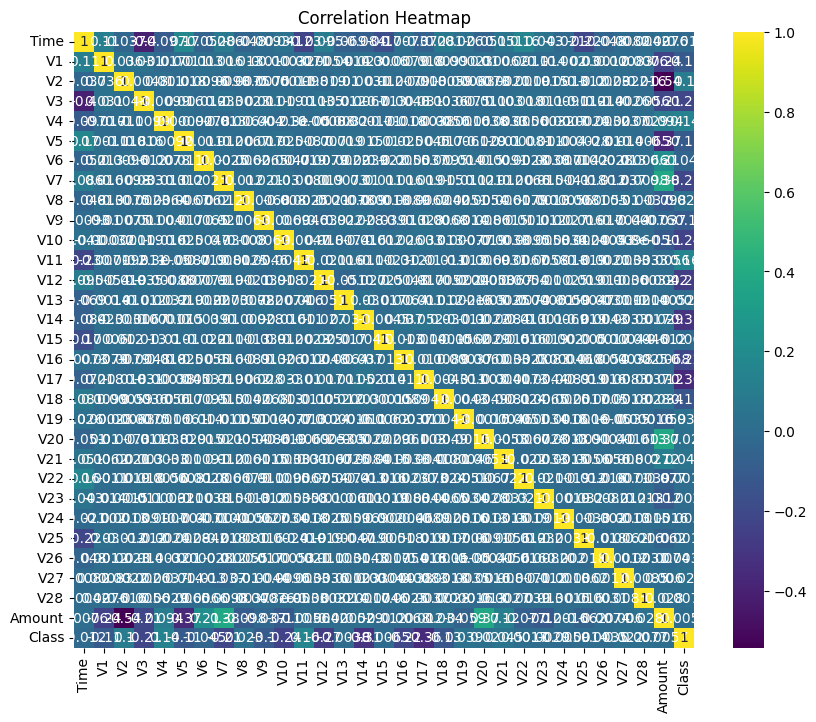

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()

 **DATA PREPROCESSING**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Scale the 'Amount' column using StandardScaler
scaler = StandardScaler()
dataset['Amount'] = scaler.fit_transform(pd.DataFrame(dataset['Amount']))

In [16]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.231260,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.350171,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137617,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.127898,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083851,0.0


In [17]:
# Drop the 'Time' column
dataset = dataset.drop(['Time'], axis=1)

In [18]:
# Display the preprocessed dataset
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.231260,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.350171,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137617,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.127898,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083851,0.0


In [19]:
dataset.shape

(235720, 30)

In [20]:
dataset.duplicated().any()

True

In [21]:
# Drop duplicates
dataset = dataset.drop_duplicates()

**The Shape of dataset after removal of duplicated values:**

In [22]:
dataset.shape

(228785, 30)

In [23]:
print(f"There were {284807-275663} duplicate values in the dataset.")

There were 9144 duplicate values in the dataset.


In [24]:
dataset['Class'].value_counts()

Class
0.0    228373
1.0       411
Name: count, dtype: int64

**Here,**

*   **0 = Regular Transaction**
*  **1 = Fraudulent Transaction**




**DATA VISUALIZATION**

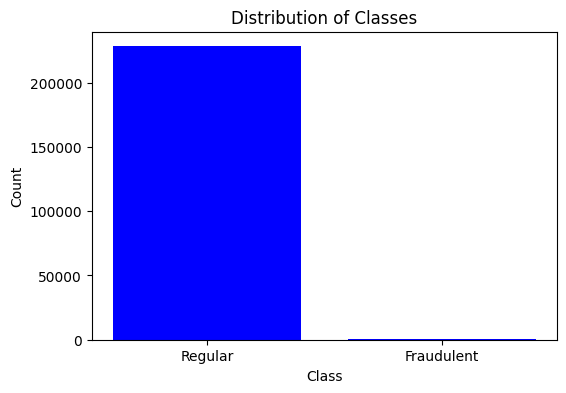

In [25]:
plt.figure(figsize=(6, 4))
plt.bar([0, 1], dataset['Class'].value_counts(), color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Regular', 'Fraudulent'])
plt.title('Distribution of Classes')
plt.show()

**DATA PREPARATION FOR MODEL TRAINING**

In [26]:
regular_trans = dataset[dataset['Class']==0]
fraud_trans = dataset[dataset['Class']==1]

In [27]:
regular_trans.shape

(228373, 30)

In [28]:
fraud_trans.shape

(411, 30)

In [29]:
# Sample regular transactions
sub_regular_trans = regular_trans.sample(n=473)

In [30]:
sub_regular_trans.shape

(473, 30)

In [31]:
# Concatenate sampled regular transactions and fraud transactions
updated_df = pd.concat([sub_regular_trans,fraud_trans])

In [32]:
updated_df['Class'].value_counts()

Class
0.0    473
1.0    411
Name: count, dtype: int64

In [33]:
updated_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118114,0.570011,-0.821692,-0.001234,1.466877,-0.587483,-0.323883,0.382326,-0.063119,0.160029,-0.086129,...,0.275940,0.081650,-0.345120,0.068109,0.435163,-0.280808,-0.035196,0.071520,0.925669,0.0
135861,-1.069058,1.219539,1.146604,-0.080228,-0.664936,-0.818474,0.095326,0.627345,-0.314900,0.003369,...,-0.174588,-0.659422,0.085960,0.452514,-0.248712,0.055235,0.229723,0.104159,-0.325240,0.0
8402,-0.614456,0.347375,0.942487,0.289119,1.319269,-0.934037,0.360745,-0.121012,1.050552,-0.855424,...,-0.022361,-0.044454,-0.111978,-0.547019,0.066811,-0.540221,0.014913,0.063511,-0.331137,0.0
78947,-0.808773,0.921445,0.808284,0.802715,-0.337009,0.059978,0.676301,0.595434,-1.023703,-0.410923,...,-0.170929,-0.941298,0.509151,-0.106698,-0.775918,-0.845096,0.010666,0.102178,0.110724,0.0
61624,1.326864,-0.618567,0.410831,-0.832726,-0.963446,-0.527423,-0.642853,-0.011497,-0.955348,0.776825,...,-0.051417,-0.395356,0.059283,-0.025647,0.219387,-0.480360,-0.002653,0.013755,-0.202528,0.0


In [62]:
updated_df = pd.concat([sub_regular_trans,fraud_trans],ignore_index = True)
updated_df.to_csv("updated.csv",index=False)

In [35]:
updated_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.570011,-0.821692,-0.001234,1.466877,-0.587483,-0.323883,0.382326,-0.063119,0.160029,-0.086129,...,0.275940,0.081650,-0.345120,0.068109,0.435163,-0.280808,-0.035196,0.071520,0.925669,0.0
1,-1.069058,1.219539,1.146604,-0.080228,-0.664936,-0.818474,0.095326,0.627345,-0.314900,0.003369,...,-0.174588,-0.659422,0.085960,0.452514,-0.248712,0.055235,0.229723,0.104159,-0.325240,0.0
2,-0.614456,0.347375,0.942487,0.289119,1.319269,-0.934037,0.360745,-0.121012,1.050552,-0.855424,...,-0.022361,-0.044454,-0.111978,-0.547019,0.066811,-0.540221,0.014913,0.063511,-0.331137,0.0
3,-0.808773,0.921445,0.808284,0.802715,-0.337009,0.059978,0.676301,0.595434,-1.023703,-0.410923,...,-0.170929,-0.941298,0.509151,-0.106698,-0.775918,-0.845096,0.010666,0.102178,0.110724,0.0
4,1.326864,-0.618567,0.410831,-0.832726,-0.963446,-0.527423,-0.642853,-0.011497,-0.955348,0.776825,...,-0.051417,-0.395356,0.059283,-0.025647,0.219387,-0.480360,-0.002653,0.013755,-0.202528,0.0


In [36]:
# Split features and target variable
X = updated_df.drop('Class',axis=1)
y = updated_df['Class']

In [37]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state =42)

**MODEL TRAINING AND EVALUATION**

In [39]:
#LOGISTIC REGRESSION:
from sklearn.linear_model import LogisticRegression
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
# Make predictions
y_pred = model.predict(X_test)

In [41]:
# Evaluate model performance:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [42]:
accuracy_score(y_test,y_pred)

0.943502824858757

In [43]:
recall_score(y_test,y_pred)

0.9333333333333333

In [44]:
f1_score(y_test,y_pred)

0.9333333333333333

In [45]:
precision_score(y_test,y_pred)

0.9333333333333333

In [46]:
# Decision Tree:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred_dt = dt.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_dt)

0.8757062146892656

In [49]:
recall_score(y_test,y_pred_dt)

0.88

In [50]:
f1_score(y_test,y_pred_dt)

0.8571428571428572

In [51]:
precision_score(y_test,y_pred_dt)

0.8354430379746836

In [52]:
#Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred_rf = rf.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_rf)

0.9548022598870056

In [55]:
f1_score(y_test,y_pred_rf)

0.9444444444444444

In [56]:
recall_score(y_test,y_pred_rf)

0.9066666666666666

In [57]:
precision_score(y_test,y_pred_rf)

0.9855072463768116

**MODEL COMPARISION**

In [58]:
result = pd.DataFrame({'Models':['LR','DT','RF'],
                       "ACC":[accuracy_score(y_test,y_pred)*100,
                              accuracy_score(y_test,y_pred_dt)*100,
                              accuracy_score(y_test,y_pred_rf)*100
                              ]})

In [59]:
result

,Models,ACC
0,LR,94.350282
1,DT,87.570621
2,RF,95.480226


**Visualizing model comparison:**

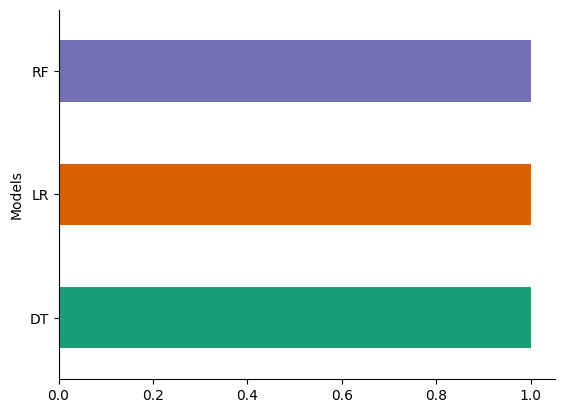

In [60]:
result.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

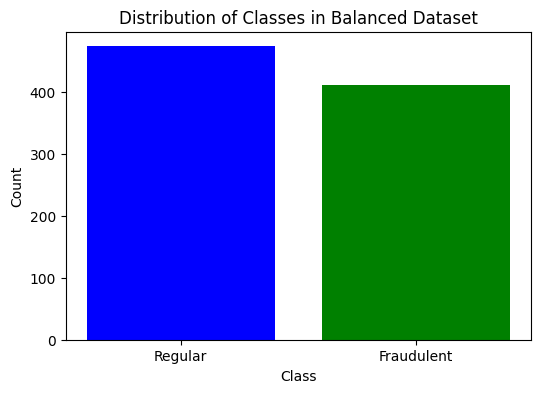

In [61]:
# Calculate the counts of fraudulent and non-fraudulent transactions in the balanced dataset
class_counts = updated_df['Class'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Balanced Dataset')
plt.xticks(class_counts.index, ['Regular', 'Fraudulent'])
plt.show()